# Thông Tin
1. MSSV: 20520800
2. Họ và tên: Đặng Anh Tiến
3. Bài tập: Bài tập 2
4. Ngày thực hiện: 28/09/2021

In [ ]:
from google.colab import drive

drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os
import cv2 as cv
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
import os

dir_monhoc = '/gdrive/MyDrive/CS231.M11'
dir_baitap = os.path.join(dir_monhoc, 'Baitap', 'Baitap2')
dir_images = os.path.join(dir_baitap, 'images')

# Yêu cầu 1
Đọc ảnh và hiển thị ảnh kết quả sau khi dò tìm
cạnh: Gx, Gy và G
– 2 ảnh: Bicycle.jpg và ( bansoxe.jpg hoặc
houseg.bmp)

In [ ]:
def sobel_filters(img):
  Sx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
  Sy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]],np.float32)
  Ix = cv.filter2D(img, -1, Sx)
  Iy = cv.filter2D(img, -1, Sy)
  G=np.hypot(Ix,Iy)
  G=np.array(G/G.max()*255, np.uint8)
  theta=np.arctan2(Iy,Ix)
  return Ix,Iy,G,theta

In [ ]:
bicycle_path = 'Bicycle.jpg'
bansoxe_path = 'bansoxejpg.jpg'
house_path = 'houseg.bmp'

In [ ]:
def FindGradient(source):
  img = cv.imread(os.path.join(dir_images, source), 0)
  Gx, Gy, G, theta = sobel_filters(img)

  plt.figure(figsize = (20, 5))

  plt.subplot(1,4,1)
  plt.title("Origin")
  plt.axis('off')
  plt.imshow(img, cmap='gray')

  plt.subplot(1,4,2)
  plt.title("Gx")
  plt.axis('off')
  plt.imshow(Gx, cmap='gray')

  plt.subplot(1,4,3)
  plt.title("Gy")
  plt.axis('off')
  plt.imshow(Gy, cmap='gray')
  
  plt.subplot(1, 4, 4)
  plt.title("G")
  plt.axis('off')
  plt.imshow(G, cmap='gray')

  plt.show()

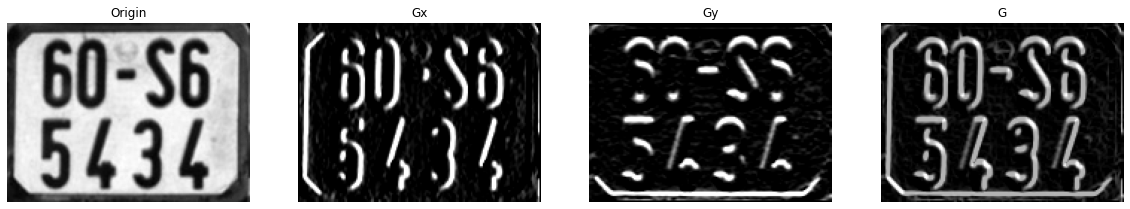

In [ ]:
FindGradient(bansoxe_path)

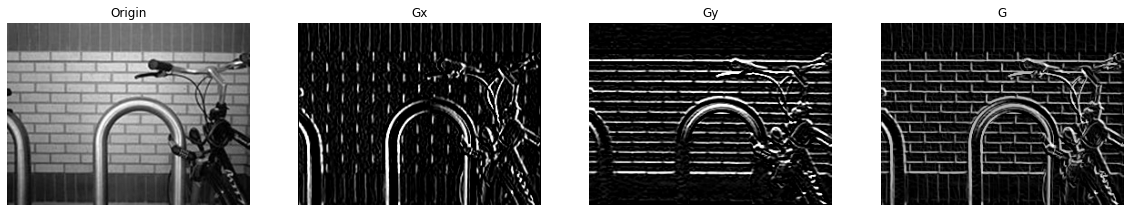

In [ ]:
FindGradient(bicycle_path)

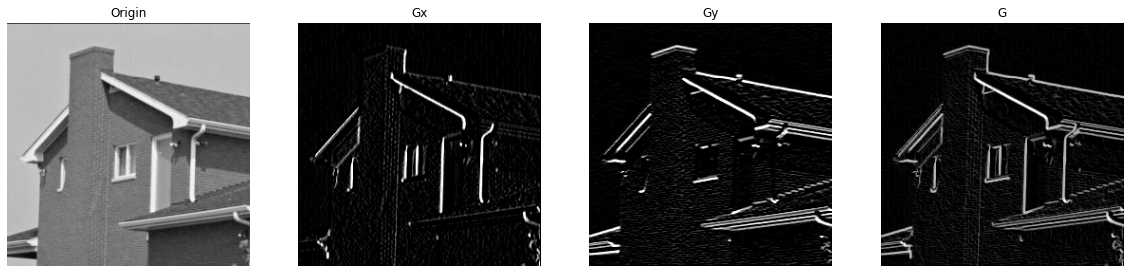

In [ ]:
FindGradient(house_path)

# Yêu cầu 2
1. Viết hàm xác định đặc trưng ảnh dựa trên
thông tin cạnh: theo trục x và trục y.
2. Tính khoảng cách euclidean giữa 2 ảnh: sử
dụng thư viện của scipy.
3. Tính sự tương đồng theo cosin giữa 2 ảnh.

In [ ]:
def calFeartureVector(img_src):
  img_dst = img_src.copy()
  img_dst = cv.resize(img_dst, (256, 256))
  Ix, Iy, G, theta = sobel_filters(img_dst)
  feature = []

  for i in range(G.shape[0]):
    tmp = 0
    for j in range(G.shape[1]):
      tmp = tmp + G[i,j]
      feature.append(tmp)

  for j in range(G.shape[1]):
    tmp = 0
    for i in range(G.shape[0]):
      tmp = tmp + G[i,j]
      feature.append(tmp)

  return feature

In [ ]:
first_couple = ['image_0814.jpg', 'image_0816.jpg']
second_couple = ['image_0814.jpg', 'image_1248.jpg']

In [ ]:
def Euclidean_distance_and_Cossin_similarity(couple):
  img1 = cv.imread(os.path.join(dir_images, couple[0]), 0)
  img2 = cv.imread(os.path.join(dir_images, couple[1]), 0)

  plt.figure(figsize=(20, 5))

  plt.subplot(1,2,1)
  plt.title(couple[0].split(".")[0])
  plt.imshow(img1, cmap = 'gray')
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.title(couple[1].split(".")[0])
  plt.imshow(img2, cmap = 'gray')
  plt.axis('off')

  print("Khoang cach Euclidean giua 2 anh {} va {} la: {}".format(couple[0].split(".")[0], couple[1].split(".")[0], distance.euclidean(calFeartureVector(img1), calFeartureVector(img2))))
  print("Su tuong dong cossin giua 2 anh {} va {} la: {}".format(couple[0].split(".")[0], couple[1].split(".")[0], 1 - distance.cosine(calFeartureVector(img1), calFeartureVector(img2))))


Khoang cach Euclidean giua 2 anh image_0814 va image_0816 la: 559911.4941140251
Su tuong dong cossin giua 2 anh image_0814 va image_0816 la: 0.9272023944396804


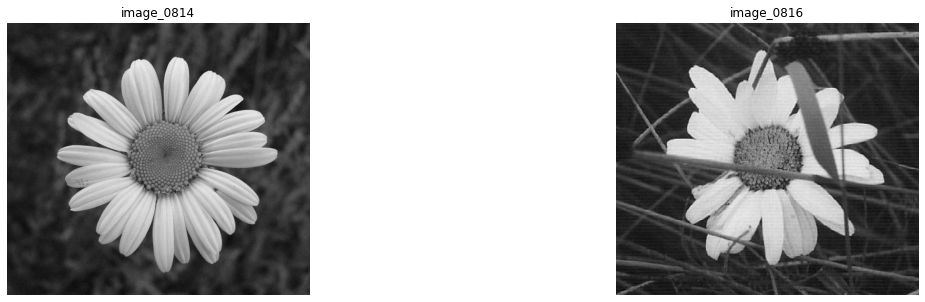

In [ ]:
Euclidean_distance_and_Cossin_similarity(first_couple)

Khoang cach Euclidean giua 2 anh image_0814 va image_1248 la: 925655.6859756224
Su tuong dong cossin giua 2 anh image_0814 va image_1248 la: 0.7709202219784477


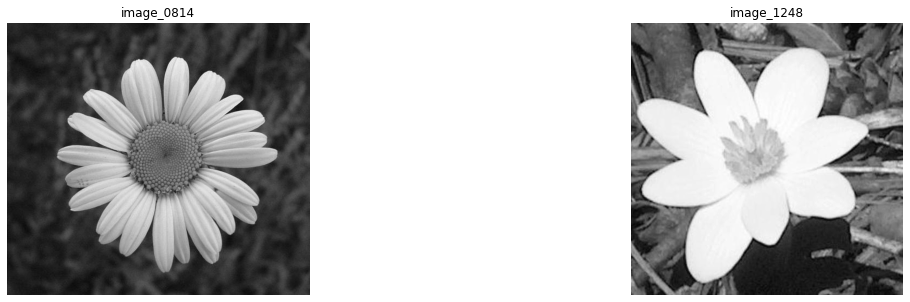

In [ ]:
Euclidean_distance_and_Cossin_similarity(second_couple)